# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
DATA_PATH = "housing.csv"

df_raw = pd.read_csv(DATA_PATH)

# Initial Exploration

## Quick peek at the data

In [5]:
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


It's lowkey atrocious that "housing_median_age" is named the way it is when there exist columns "median_income" and "median_house_value." 🤢

In [4]:
# define our independent (features) and dependent (target) variables
DEP = "median_house_value"
INDEPS = df_raw.columns.drop(DEP)

print(f"{DEP=}")
print(f"{INDEPS=}")

DEP='median_house_value'
INDEPS=Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [8]:
df_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df_raw.shape

(20640, 10)

In [7]:
df_raw.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Hmm, what are the possible values ocean_proximity can take on?

In [9]:
df_raw["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Light Cleaning

***ALWAYS*** check for NaNs!

In [12]:
df_raw.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df_raw.query("total_bedrooms.isna()")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


There are a few bad rows with missing tota_bedrooms. I don't think there's a good default value or way to infer the true values.

There aren't too many of these rows, so I'll just drop them.

In [6]:
df = df_raw.query("~total_bedrooms.isna()").copy()

print(f"{df_raw.shape=}")
print(f"{df.shape=}")

df_raw.shape=(20640, 10)
df.shape=(20433, 10)


## Visualize Distributions

In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
df[DEP].describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'median_house_value histogram')

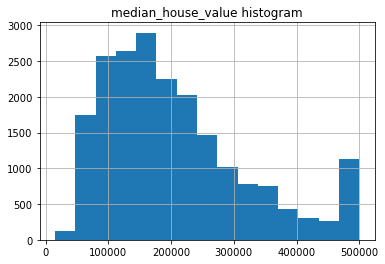

In [28]:
df[DEP].hist(bins=15)
plt.title(f"{DEP} histogram")

Dep looks kind of right-skewed, with a lot of outlier values on the expensive side.

I actually suspect that median_house_value, and maybe some other columns like median_house_

# Predict Housing Prices

## Visualize Feature Correlations

I'm not gonna look at all the features, only the most interesting ones. You, however, should go through each feature in your free time.

In [29]:
INDEPS

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

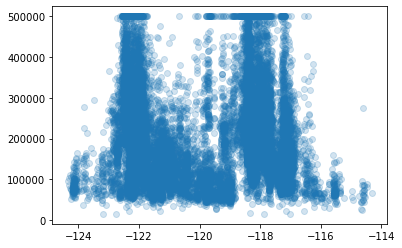

In [43]:
INDEP="longitude"

plt.scatter(df[INDEP], df[DEP], alpha=0.2)

### latitude/longitude

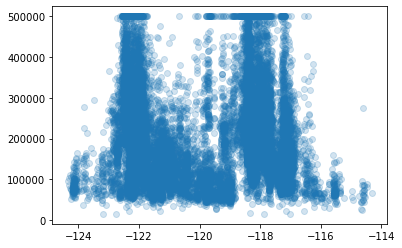

In [51]:
INDEP="longitude"

plt.scatter(df[INDEP], df[DEP], alpha=0.2)

At a glance, it looks like there won't be a consistent linear relationship between lat/long and median_house_value. This makes sense, given what we know about latitude and longitude.

We do notice that there are a lot of datapoints concentrated at a few different stripes:
* latitude: 34, 37.5
* longitude: -122.2, -118

If we scatter latitude/longitude we can better visualize the hotspots

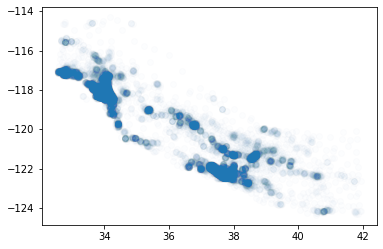

In [49]:
plt.scatter(df["latitude"], df["longitude"], alpha=0.01)

The (34, -118) points correspond to Los Angeles and the (38, -122.2) points correspond to the San Francisco Bay Area. Checks out!

https://www.gps-coordinates.net/

We're not gonna use these features for our linear model though. Maybe latitude/longitude would be great for a nearest neighbors model?

### median_income

My prior was that this would be one of our best features for a linear regression

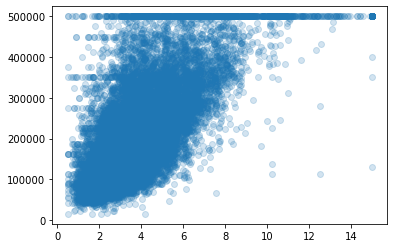

In [45]:
INDEP="median_income"

plt.scatter(df[INDEP], df[DEP], alpha=0.2)

Looks noisy, we can use bin the data before plotting

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

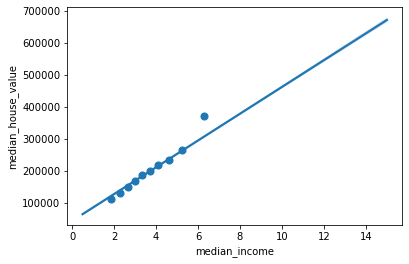

In [46]:
sns.regplot(x=df[INDEP], y=df[DEP], x_bins=10)

Clean. Extremely clean. Most regplots/binplots aren't going to look like this. What happens if you try doing the regplot for a feature like median_housing_age?

### total_rooms

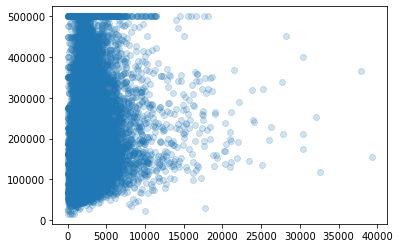

In [78]:
INDEP="total_rooms"

plt.scatter(df[INDEP], df[DEP], alpha=0.2)

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

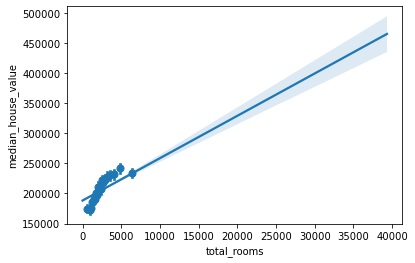

In [82]:
sns.regplot(x=df[INDEP], y=df[DEP], x_bins=20)

Hmm, the shape of the bins doesn't look very linear. Let's remove to regression line to get a better look at things.

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

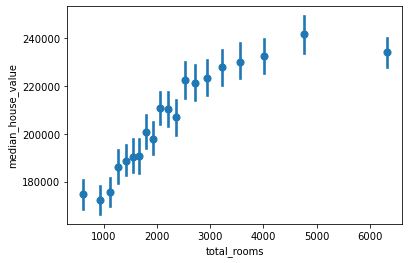

In [83]:
sns.regplot(x=df[INDEP], y=df[DEP], x_bins=20, fit_reg=False)

Yup, doesn't look as linear as we'd like. Let's transform our features to line things up a bit.

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

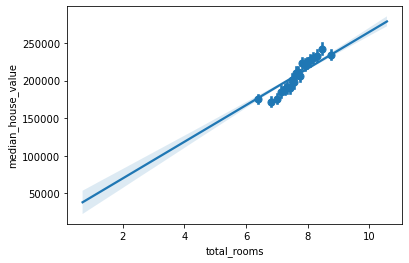

In [84]:
sns.regplot(x=np.log(df[INDEP]), y=df[DEP], x_bins=20)

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

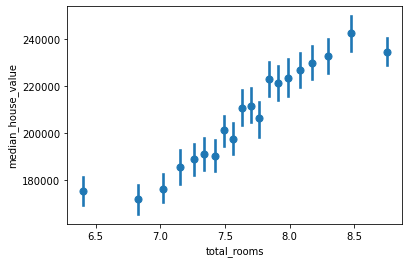

In [87]:
sns.regplot(x=np.log(df[INDEP]), y=df[DEP], x_bins=20, fit_reg=False)

This looks a lot better. I think doing a square root or cube root transformation or whatever would also be reasonable.

It sort of makes sense that a log transform works for a feature like total_rooms. I can imagine that this feature may be pretty correlated with something like population density, which probably follows a log-normal distribution rather than just a regular normal distribution. 

What I mean by this is that it's not crazy to imagine the very low density places have 10x less density that the median density places and the median density places maybe have 10x less density than the very high density places. But we don't expect housing price differences of 100x between the highest and lowest density places. Hence why log transform helps.

### ocean_proximity

Our one and only categorical feature!

In [115]:
INDEP = "ocean_proximity"

Let's do a kind of hacky transform where we change the ocean_proximity categories to include the number of datapoints in each category.

I am doing this because I can't figure out a way to include a legend in seaborn's violinplot

In [123]:
counts = df.groupby(INDEP).count().iloc[:, 0]
counts

ocean_proximity
<1H OCEAN     9034
INLAND        6496
ISLAND           5
NEAR BAY      2270
NEAR OCEAN    2628
Name: longitude, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

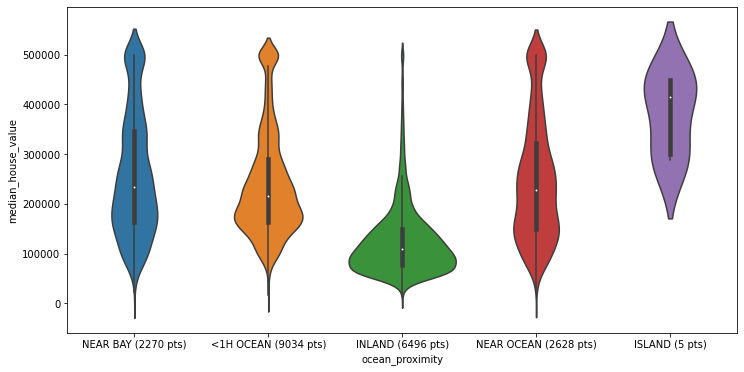

In [134]:
plt.figure(figsize=(12,6))
sns.violinplot(
    x=df[INDEP].map(lambda cat: f"{cat} ({counts[cat]} pts)"), 
    y=df[DEP],
)

Seems like INLAND housing is cheaper than housing near the ocean for the most part.

It's hard to draw any conclusions about ISLAND with so few datapoints.

I'm not going to include ocean_proximity as a feature in the final model, but if you wanted to use this feature in some way, perhaps you could branch on this feature and fit a separate linear model per category

## Model Construction

We're gonna go with a simple linear model fit using OLS. Feature list:
* median_income
* log(total_rooms)
* log(total_bedrooms)
* log(population) (there are some issues with this feature near the lower end of its values)
* log(households)

In [17]:
# add an intercept term
df["intercept"] = 1

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_total_rooms,log_total_bedrooms,log_population,log_households,intercept
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.779922,4.859812,5.774552,4.836282,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867709,7.008505,7.783641,7.037028,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.290975,5.247024,6.206576,5.176150,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.149917,5.459586,6.324359,5.389072,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.394493,5.634790,6.336826,5.556828,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,7.417580,5.924256,6.739337,5.799093,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.546785,5.010635,5.874931,4.736198,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,7.720462,6.184149,6.914731,6.070738,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,7.528332,6.013715,6.608001,5.855072,1


In [9]:
TRANSFORM_FEATURES = [
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
]

for feat in TRANSFORM_FEATURES:
    df[f"log_{feat}"] = np.log(df[feat])
    
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_total_rooms,log_total_bedrooms,log_population,log_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.779922,4.859812,5.774552,4.836282
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867709,7.008505,7.783641,7.037028
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.290975,5.247024,6.206576,5.176150
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.149917,5.459586,6.324359,5.389072
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.394493,5.634790,6.336826,5.556828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,7.417580,5.924256,6.739337,5.799093
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.546785,5.010635,5.874931,4.736198
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,7.720462,6.184149,6.914731,6.070738
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,7.528332,6.013715,6.608001,5.855072


In [15]:
MODEL_FEATURES = [
    "intercept",
    "median_income",
    *[f"log_{feat}" for feat in TRANSFORM_FEATURES]
]

MODEL_FEATURES

['intercept',
 'median_income',
 'log_total_rooms',
 'log_total_bedrooms',
 'log_population',
 'log_households']

### Fitting

In [13]:
model = sm.OLS(df[DEP], sm.add_constant(df[MODEL_FEATURES]))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     5485.
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:56:06   Log-Likelihood:            -2.5847e+05
No. Observations:               20433   AIC:                         5.170e+05
Df Residuals:                   20427   BIC:                         5.170e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.007e+05   6708

### Predictions

In [149]:
res.params

intercept             300653.410409
median_income          53703.554540
log_total_rooms      -136437.588282
log_total_bedrooms    111557.973696
log_population        -92961.428945
log_households        119896.067200
dtype: float64

In [152]:
DEP

'median_house_value'

In [153]:
PRED = f"pred_{DEP}"

df[PRED] = res.predict(df[MODEL_FEATURES])

df[[PRED,DEP]]

,pred_median_house_value,median_house_value
0,407901.490562,452600.0
1,438567.460441,358500.0
2,324613.774762,352100.0
3,295457.886628,341300.0
4,204088.381855,342200.0
...,...,...
20635,102098.297556,78100.0
20636,125420.978297,77100.0
20637,113533.712429,92300.0
20638,132370.050648,84700.0


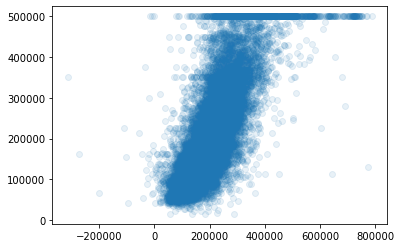

In [155]:
plt.scatter(df[PRED], df[DEP], alpha=0.1)

<AxesSubplot:xlabel='pred_median_house_value', ylabel='median_house_value'>

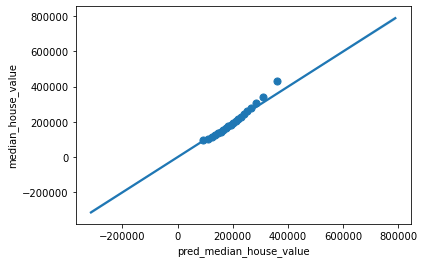

In [156]:
sns.regplot(x=df[PRED], y=df[DEP], x_bins=20)

Not bad.